         Date     Open    High     Low   Close   Volume
0  31-Mar-2021  252.75  254.00  248.95  253.05   614077
1  30-Mar-2021  254.90  254.90  249.35  252.75  1306713
2  26-Mar-2021  249.80  254.00  244.10  252.85  1290793
3  25-Mar-2021  251.65  251.65  241.70  244.65   942604
4  24-Mar-2021  250.80  261.85  247.20  251.65  2684226

****
             Date    Open   High    Low  Close  Volume
2970  09-Apr-2009  34.00  34.70  30.00  31.10  439006
2971  08-Apr-2009  26.00  32.50  26.00  32.50  552138
2972  06-Apr-2009  27.00  27.70  26.75  27.05   77410
2973  02-Apr-2009  26.70  27.25  26.00  26.60  136483
2974  01-Apr-2009  26.05  27.30  25.70  26.50  122548
_________________________________________________________

OPEN 
	Average :  142.6154453781514 
	Maximum :  311.4 
	Minimum :  26.0 
	Standard Deviation :  51.49907785022448


HIGH 
	Average :  145.71092436974848 
	Maximum :  314.5 
	Minimum :  27.25 
	Standard Deviation :  52.36149821943779


LOW 
	Average :  139.660134453781 
	Ma

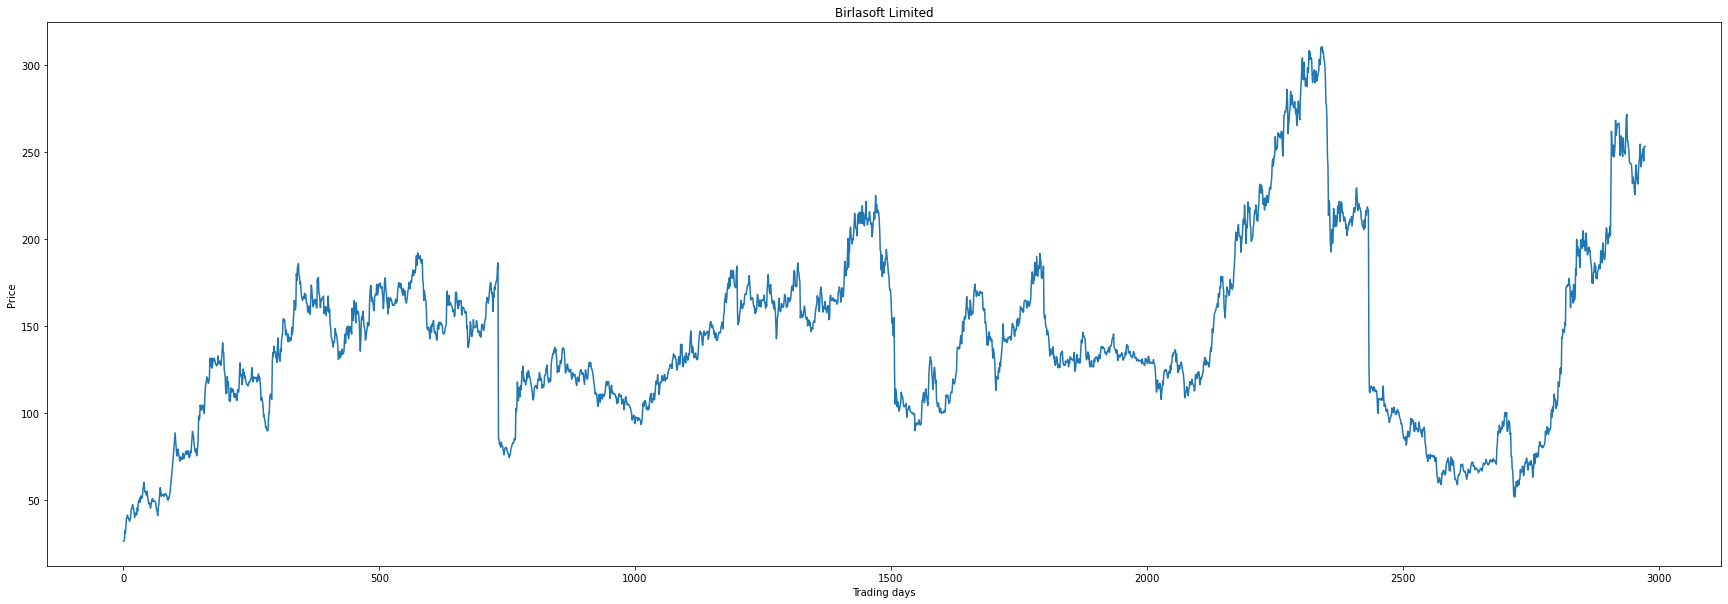

In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel("/home/shravan/Desktop/Datasets/IT/bsoft/bsoft.xlsx")

print(df.head())
print("\n****\n",df.tail())

print("_________________________________________________________\n\nOPEN \n\tAverage : ",np.mean(df.loc[:]['Open']),"\n\tMaximum : ", np.max(df['Open']),"\n\tMinimum : ", np.min(df['Open']),"\n\tStandard Deviation : ", np.std(df['Open']))
print("\n\nHIGH \n\tAverage : ",np.mean(df.loc[:]['High']),"\n\tMaximum : ", np.max(df['High']),"\n\tMinimum : ", np.min(df['High']),"\n\tStandard Deviation : ", np.std(df['High']))
print("\n\nLOW \n\tAverage : ",np.mean(df.loc[:]['Low']),"\n\tMaximum : ", np.max(df['Low']),"\n\tMinimum : ", np.min(df['Low']),"\n\tStandard Deviation : ", np.std(df['Low']))
print("\n\nCLOSE \n\tAverage : ",np.mean(df.loc[:]['Close']),"\n\tMaximum : ", np.max(df['Close']),"\n\tMinimum : ", np.min(df['Close']),"\n\tStandard Deviation : ", np.std(df['Close']))
print("\n\nVOLUME \n\tAverage : ",np.mean(df.loc[:]['Volume']),"\n\tMaximum : ", np.max(df['Volume']),"\n\tMinimum : ", np.min(df['Volume']),"\n\tStandard Deviation : ", np.std(df['Volume']))

def reverse_data(df):
    date = []
    day = []
    open = []
    high = []
    low = []
    close = []
    volume = []
    for i in range(len(df)-1, -1, -1):
        day.append((len(df)-1)-i)
        date.append(df.loc[i]['Date '])
        open.append(df.loc[i]['Open'])
        high.append(df.loc[i]['High'])
        low.append(df.loc[i]['Low'])
        close.append(df.loc[i]['Close'])
        volume.append(df.loc[i]['Volume'])
    stocks = pd.DataFrame()
    stocks['Day'] = day
    stocks['Date'] = date
    stocks['Open'] = open
    stocks['High'] = high
    stocks['Low'] = low
    stocks['Close'] = close
    stocks['Volume'] = volume
    return stocks

stocks = reverse_data(df)

print(stocks.head())
print("\n****\n",stocks.tail())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30,10)
fig,ax = plt.subplots()

ax.plot(stocks['Day'],stocks['Close'])
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.title("Birlasoft Limited")
plt.show()

   Day         Date      Open      High       Low     Close    Volume
0    0  01-Apr-2009  0.000175  0.000174  0.000000  0.000000  0.002020
1    1  02-Apr-2009  0.002453  0.000000  0.001063  0.000353  0.002251
2    2  06-Apr-2009  0.003504  0.001567  0.003719  0.001939  0.001272
3    3  08-Apr-2009  0.000000  0.018277  0.001063  0.021157  0.009137
4    4  09-Apr-2009  0.028031  0.025936  0.015229  0.016220  0.007262

****
        Day         Date      Open      High       Low     Close    Volume
2970  2970  24-Mar-2021  0.787666  0.816710  0.784487  0.793900  0.044458
2971  2971  25-Mar-2021  0.790645  0.781201  0.765008  0.769217  0.015605
2972  2972  26-Mar-2021  0.784163  0.789382  0.773508  0.798131  0.021374
2973  2973  30-Mar-2021  0.802032  0.792515  0.792102  0.797779  0.021638
2974  2974  31-Mar-2021  0.794499  0.789382  0.790685  0.798836  0.010163


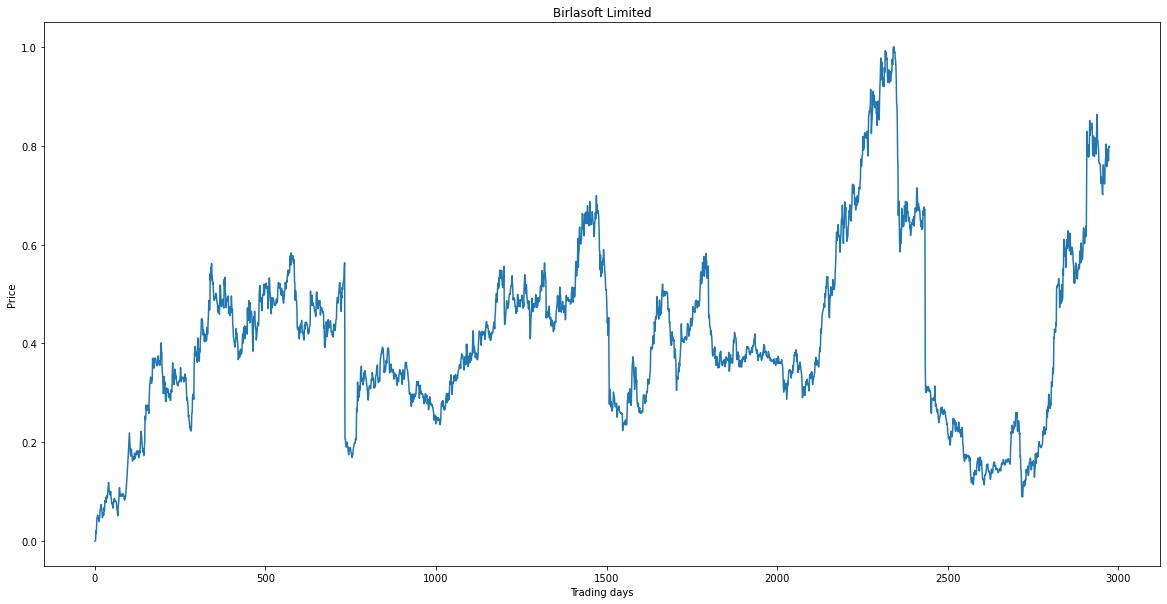

In [2]:
from sklearn.preprocessing import MinMaxScaler

def get_normalised_data(data):
    scaler = MinMaxScaler()
    numerical = ['Open','High','Low','Close','Volume']
    data[numerical] = scaler.fit_transform(data[numerical])
    return data

stocks = get_normalised_data(stocks)

print(stocks.head())
print("\n****\n",stocks.tail())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
fig,ax = plt.subplots()

ax.plot(stocks['Day'],stocks['Close'])
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.title("Birlasoft Limited")
plt.show()

In [3]:
import math
from IPython.display import display
import time
from keras.layers.core import Dense,Dropout,Activation
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from keras.layers.recurrent import LSTM
from keras.layers.recurrent import GRU
from keras.layers.recurrent import SimpleRNN

#UNROLL_FUNCTION
def unroll(stocks,unroll_length):
    result = []
    for i in range(len(stocks)-unroll_length+1):
        result.append(stocks[i : (i+unroll_length)])
    return np.asarray(result)

#SIMPLERNN_MODEL
def build_model(input_dim,output_dim,return_sequences):
    model = Sequential()
    model.add(SimpleRNN(input_shape = (None,input_dim), units = output_dim, return_sequences = return_sequences))
    model.add(Dropout(0.1))
    model.add(SimpleRNN(units = 100, return_sequences = False))
    model.add(Dense(units = 100))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model

#LSTM_MODEL
def build_lstm_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model.add(LSTM(input_shape = (None, input_dim), units = output_dim, return_sequences = return_sequences))
    model.add(LSTM(units = 128, return_sequences = False))
    model.add(Dense(units = 200))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model


#GRU_MODEL
def build_gru_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model.add(GRU(input_shape = (None,input_dim), units = output_dim, return_sequences=return_sequences))
    #model.add(Dropout(0.2))
    model.add(GRU(units=128,return_sequences = False))
    #model.add(Dropout(0.2))
    model.add(Dense(units = 200))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model


def plot_prediction(actual, prediction, title='BIRLASOFT TRADING VS PREDICTIONS', y_label='Price INR', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values
    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.show()


#RESULT_STAT_FUNCTION
def err_stat(y_test,preds):
    Error = preds - y_test
    print("Standard Deviation of Error : ", np.std(Error))
    stdErr = np.std(Error)
    DstdErr = stdErr * (np.max(df['Close']) - np.min(df['Close']))
    print("Denormalised Standard Deviation : ", DstdErr)
    print("Ratio of Standard Deviation of Error to Standard Deviation of Stock Price : ", DstdErr/np.std(df['Close']))




#####
#TRAIN_TEST_SPLIT
stocks = stocks.drop(['Date','Day'], axis =1)
stocks.head()

def train_test_split(stocks,unroll_length,prediction_size,prediction_time):
    x_test_start = prediction_size + prediction_time + unroll_length - 1
    
    #train data
    x_train = stocks[0 : (-x_test_start - prediction_time)].to_numpy()
    y_train = stocks[ (unroll_length - 1 + prediction_time) : -x_test_start]['Close'].to_numpy()
    
    #test_data
    x_test = stocks[-x_test_start : -prediction_time].to_numpy()
    y_test = stocks[-prediction_size:]['Close'].to_numpy()

    
    return x_train,x_test,y_train,y_test

prediction_size = 744
prediction_time = 5
unroll_length = 50

x_train,x_test,y_train,y_test = train_test_split(stocks,unroll_length,prediction_size,prediction_time)

x_train = unroll(x_train,unroll_length)
x_test = unroll(x_test,unroll_length)

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

#####



x_train (2123, 50, 5)
y_train (2123,)
x_test (744, 50, 5)
y_test (744,)


Epoch 1/50
63/63 [==============================] - 2s 16ms/step - loss: 0.1054 - val_loss: 0.0062
Epoch 2/50
63/63 [==============================] - 1s 14ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 3/50
63/63 [==============================] - 1s 14ms/step - loss: 0.0034 - val_loss: 0.0043
Epoch 4/50
63/63 [==============================] - 1s 13ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 5/50
63/63 [==============================] - 1s 13ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 6/50
63/63 [==============================] - 1s 14ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 7/50
63/63 [==============================] - 1s 15ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 8/50
63/63 [==============================] - 1s 15ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 9/50
63/63 [==============================] - 1s 14ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 10/50
63/63 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 11/

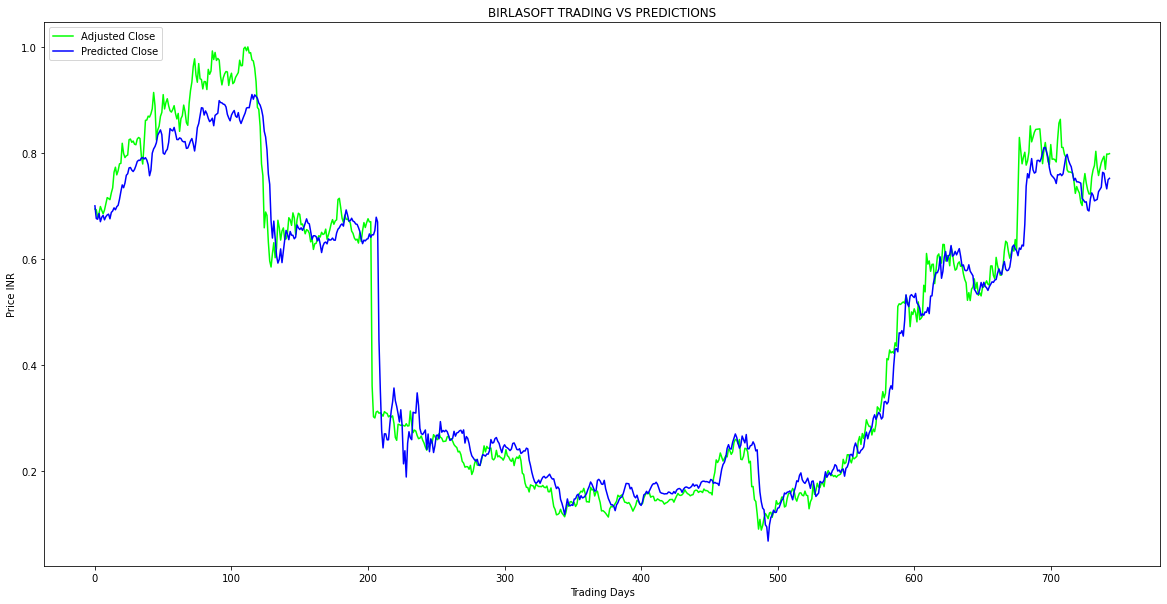

Standard Deviation of Error :  0.3870732562994334
Denormalised Standard Deviation :  109.77397548651932
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  2.133054424988795
Train Score: 0.00119519 MSE (0.03457146 RMSE)
Test Score: 0.00290913 MSE (0.05393637 RMSE)
Epoch 1/50
63/63 [==============================] - 6s 51ms/step - loss: 0.0274 - val_loss: 0.0030
Epoch 2/50
63/63 [==============================] - 3s 41ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 3/50
63/63 [==============================] - 3s 41ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 4/50
63/63 [==============================] - 3s 44ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 5/50
63/63 [==============================] - 3s 41ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 6/50
63/63 [==============================] - 2s 39ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 7/50
63/63 [==============================] - 3s 46ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/50
63/63 

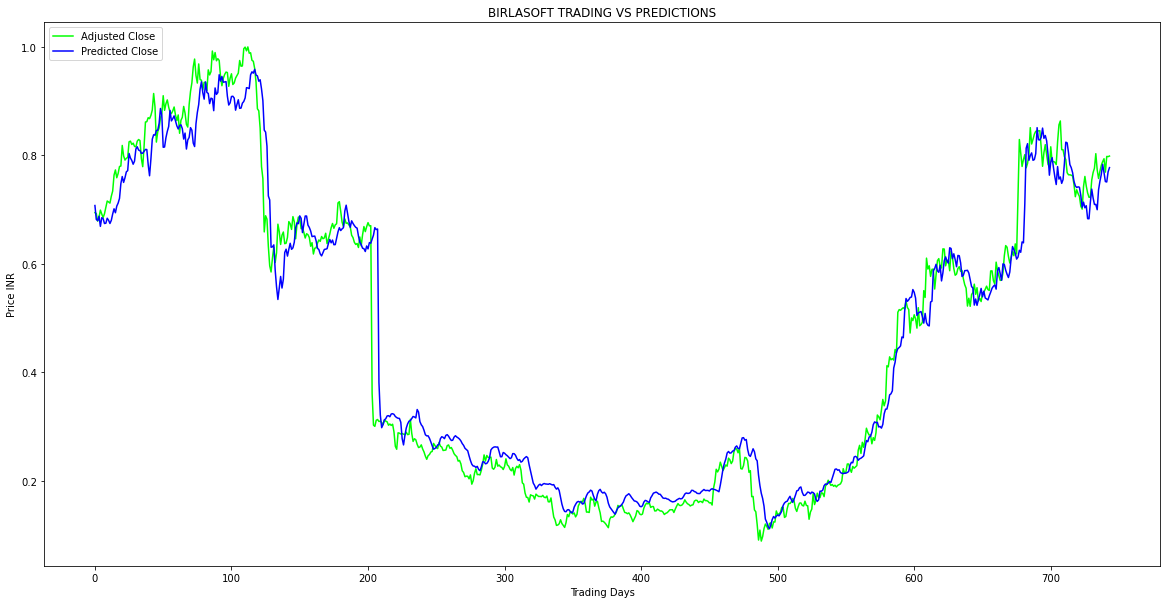

Standard Deviation of Error :  0.3902879343285934
Denormalised Standard Deviation :  110.6856581755891
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  2.15076963285557
Train Score: 0.00119593 MSE (0.03458215 RMSE)
Test Score: 0.00253162 MSE (0.05031518 RMSE)
Epoch 1/50
63/63 [==============================] - 5s 42ms/step - loss: 0.0114 - val_loss: 0.0023
Epoch 2/50
63/63 [==============================] - 2s 32ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 3/50
63/63 [==============================] - 2s 32ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/50
63/63 [==============================] - 2s 32ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 5/50
63/63 [==============================] - 2s 31ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 6/50
63/63 [==============================] - 2s 32ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 7/50
63/63 [==============================] - 2s 32ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/50
63/63 [=

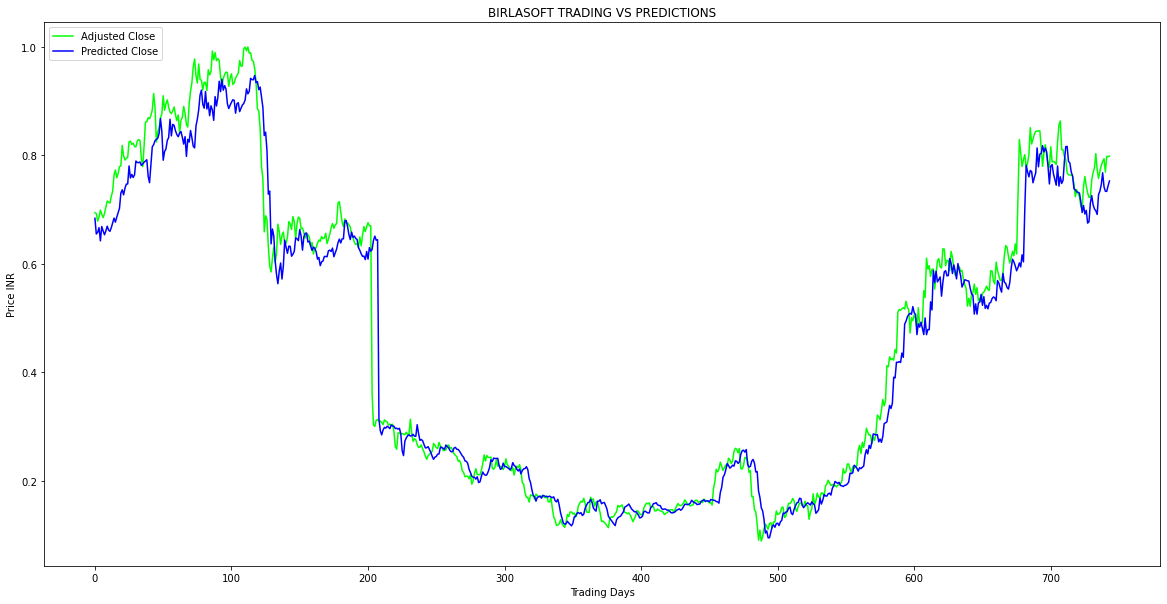

Standard Deviation of Error :  0.39198898973945856
Denormalised Standard Deviation :  111.16807749011046
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  2.160143682114324
Train Score: 0.00116423 MSE (0.03412089 RMSE)
Test Score: 0.00266060 MSE (0.05158098 RMSE)


In [5]:
#TRAIN_SIMPLE_RNN_MODEL
model = build_model(input_dim = x_train.shape[-1], output_dim = unroll_length, return_sequences=True)
model.compile(loss = "mean_squared_error", optimizer = 'Adam')
model.fit(x_train, y_train, epochs =50, validation_split = 0.05)

preds = model.predict(x_test)
plot_prediction(y_test, preds)
err_stat(y_test,preds)

trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

#TRAIN_LSTM_MODEL
lstm_model = build_lstm_model(x_train.shape[-1], unroll_length, return_sequences = True)
lstm_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
lstm_model.fit(x_train, y_train, epochs = 50, validation_split = 0.05)

preds_lstm = lstm_model.predict(x_test)
plot_prediction(y_test, preds_lstm)
err_stat(y_test,preds_lstm)

trainScore = lstm_model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = lstm_model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))


#TRAIN_GRU_MODEL
gru_model = build_gru_model(x_train.shape[-1], unroll_length, return_sequences = True)
gru_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
gru_model.fit(x_train, y_train, epochs = 50, validation_split = 0.05)

preds_gru = gru_model.predict(x_test)
plot_prediction(y_test, preds_gru)
err_stat(y_test,preds_gru)

trainScore = gru_model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = gru_model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

